In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

In [2]:
path_AE_metrics = "../../Results/AE_tif_mixed_bright/metrics_AE.csv"
path_image_info = "../../Results/AE_tif_mixed_bright/image_list.csv"

In [3]:
AE_metrics = pd.read_csv(path_AE_metrics, index_col=0)
list_images = pd.read_csv(path_image_info, index_col=0)

In [4]:
AE_metrics.head(3)

,normalization,standardization,image_type,channel_image,image_resize_x,image_resize_y,Image_path,autoencoder_name,prediction_interation,prediction_size,...,gini_latent_space,kurtois_latent_space,entropy_latent_space,mean_activation_latent_space,MSE_compared_to_start,latent_distance_to_start,SSIM_compared_to_start,MSE_compared_to_previous_step,latent_distance_to_previous_step,SSIM_compared_to_previous_step
0,True,True,RGB,ALL,NaN,NaN,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,0.0,128.0,...,0.208666,-0.290257,-inf,-0.062343,0.000817,0.001623,0.0,0.000817,0.001623,0.0
1,True,True,RGB,ALL,NaN,NaN,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,1.0,128.0,...,0.237757,-0.495719,-inf,-0.082150,0.001837,0.006039,0.0,0.000364,0.001481,0.0
2,True,True,RGB,ALL,NaN,NaN,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,2.0,128.0,...,0.249531,-0.607644,-inf,-0.101951,0.003533,0.013641,0.0,0.000374,0.001622,0.0


In [5]:
list_images.head(3)

,Image_path,filename,type,folder,habitat,color_control,tv_loss,layers,sex,fish_n,species,img_width,img_height,image_extension
0,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,F,2.0,punctulatum,6543,2213,.jpg
1,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_TUQU_M01.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,M,1.0,punctulatum,6352,2140,.jpg
2,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F04.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,F,4.0,punctulatum,6662,2078,.jpg


In [6]:
merged = list_images.merge(AE_metrics, on=["Image_path"], how='inner')
merged.head(3)

,Image_path,filename,type,folder,habitat,color_control,tv_loss,layers,sex,fish_n,...,gini_latent_space,kurtois_latent_space,entropy_latent_space,mean_activation_latent_space,MSE_compared_to_start,latent_distance_to_start,SSIM_compared_to_start,MSE_compared_to_previous_step,latent_distance_to_previous_step,SSIM_compared_to_previous_step
0,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,F,2.0,...,0.208666,-0.290257,-inf,-0.062343,0.000817,0.001623,0.0,0.000817,0.001623,0.0
1,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,F,2.0,...,0.237757,-0.495719,-inf,-0.082150,0.001837,0.006039,0.0,0.000364,0.001481,0.0
2,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,F,2.0,...,0.249531,-0.607644,-inf,-0.101951,0.003533,0.013641,0.0,0.000374,0.001622,0.0


In [7]:
print(merged.columns)

Index(['Image_path', 'filename', 'type', 'folder', 'habitat', 'color_control',
       'tv_loss', 'layers', 'sex', 'fish_n', 'species', 'img_width',
       'img_height', 'image_extension', 'normalization', 'standardization',
       'image_type', 'channel_image', 'image_resize_x', 'image_resize_y',
       'autoencoder_name', 'prediction_interation', 'prediction_size',
       'gini_pxl_space', 'kurtois_pxl_space', 'entropy_pxl_space',
       'gini_latent_space', 'kurtois_latent_space', 'entropy_latent_space',
       'mean_activation_latent_space', 'MSE_compared_to_start',
       'latent_distance_to_start', 'SSIM_compared_to_start',
       'MSE_compared_to_previous_step', 'latent_distance_to_previous_step',
       'SSIM_compared_to_previous_step'],
      dtype='object')


ValueError: There must be exactly two hue levels to use `split`.'

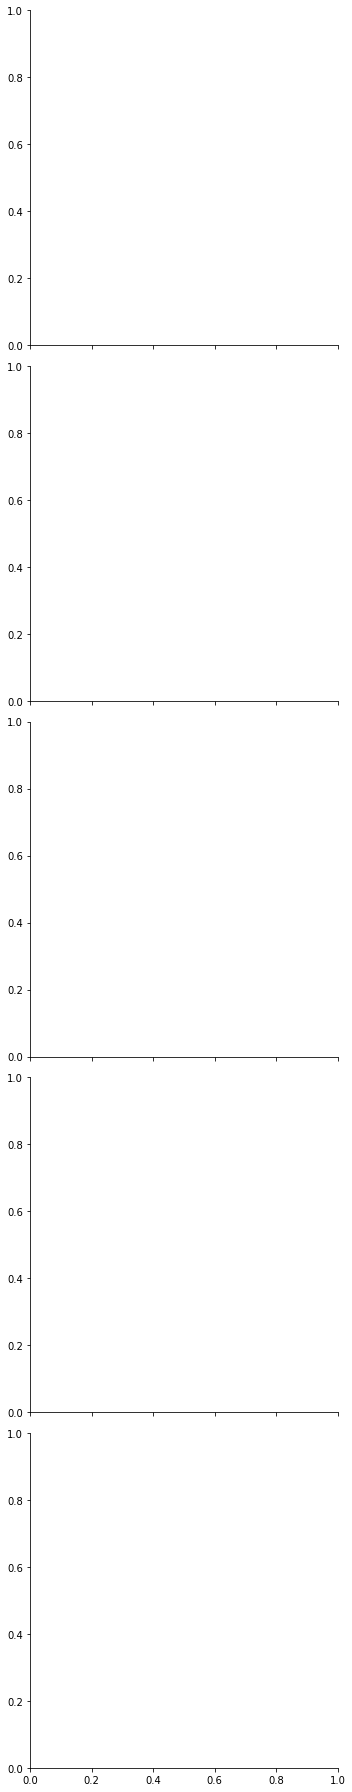

In [8]:
f=sns.catplot(data=merged.loc[merged["prediction_interation"]==0], 
            x="species", hue="sex", split=True, 
            y="gini_latent_space", row="autoencoder_name", kind="violin")


In [ ]:
merged.drop("0")

In [ ]:
%matplotlib inline
f=sns.relplot(data=merged.loc[merged["prediction_interation"]==0], 
            x="habitat", y="mean_activation_latent_space", hue="autoencoder_name")

In [ ]:
%matplotlib inline
f=sns.relplot(data=merged.loc[merged["prediction_interation"]==0], 
            x="habitat", y="gini_latent_space", hue="autoencoder_name")

In [ ]:
f=sns.relplot(data=merged.loc[merged["prediction_interation"]==0], 
            x="habitat", y="kurtois_latent_space", hue="autoencoder_name")

In [ ]:
f=sns.relplot(data=merged.loc[merged["prediction_interation"]==0], 
            x="habitat", y="MSE_compared_to_start", hue="autoencoder_name")

In [ ]:
data = merged.loc[merged["prediction_interation"]==0][['Image_path', 'filename', 
       'folder', 'habitat',
       'sex', 'fish_n', 'species',
       'autoencoder_name',
       'gini_latent_space', 'kurtois_latent_space',
       'mean_activation_latent_space', 'MSE_compared_to_start',
       'latent_distance_to_start']]
data.head()

In [ ]:
one_hot_data = pd.get_dummies(data.drop(columns=["filename", "folder"]), columns=["habitat", "sex"])
one_hot_data = one_hot_data.drop(columns=["sex_F", "sex_0"])
one_hot_data.head()

In [ ]:
columns_numbers=[
       'gini_latent_space', 'kurtois_latent_space',
       'mean_activation_latent_space', 'MSE_compared_to_start',
       'latent_distance_to_start']
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = one_hot_data.copy()
data_scaled[columns_numbers] = min_max_scaler.fit_transform(data_scaled[columns_numbers])
data_scaled.head()

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
corr = data_scaled.corr()
#custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [ ]:
sns.relplot(data=data, x="gini_latent_space", y="kurtois_latent_space")
plt.show()

Is the mse from a prediction correlated to the habitat?

In [ ]:
min_max_scaler2 = preprocessing.MinMaxScaler()
data_scaled = data[["Image_path","habitat","autoencoder_name", *columns_numbers]].copy()
data_scaled[columns_numbers] = min_max_scaler2.fit_transform(data_scaled[columns_numbers])
data_scaled.head()

In [ ]:
col_mse="gini_latent_space"
habitats=["sand", "boulder", "bedrock", "detritus", "gravel"]

for hab in habitats:
    data_hab = data_scaled[data_scaled["habitat"]==hab][["habitat", "autoencoder_name", col_mse]]
    mean_grps = data_hab.groupby("autoencoder_name").mean()
    print("\n",hab)
    print(mean_grps)

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
columns_params=[
       'gini_latent_space', 'kurtois_latent_space',
       'mean_activation_latent_space', 'MSE_compared_to_start',
       'latent_distance_to_start']

X = data_scaled.pivot(index=["Image_path"], columns=["autoencoder_name"], values=columns_params)
X.columns = ["_".join(map(str, col )) if isinstance(col, tuple) else col for col in X.columns]

#y = pd.get_dummies(data_scaled[["habitat","Image_path"]], columns=["habitat"]).drop_duplicates()
y = data_scaled[["habitat","Image_path"]].drop_duplicates()

my_data = X.merge(y,how="left", on="Image_path")
my_data.head()

train, test = train_test_split(my_data.drop('Image_path', axis=1), test_size=0.2)

X_train = train[X.columns]
X_test = test[X.columns]

y_train = train.drop(X.columns, axis=1)
y_test = test.drop(X.columns, axis=1)

train.head()

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, y_train.values.ravel())
y_pred = neigh.predict(X_test)
print(neigh.score(X_train, y_train))
print(neigh.score(X_test, y_test))

In [ ]:
reg = LogisticRegression().fit(X_train, y_train.values.ravel())
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

In [ ]:
SVM = svm.SVC()
SVM.fit(X_train, y_train.values.ravel())
print("score: ",SVM.score(X_test,y_test))
y_pred = SVM.predict(X_test)
print("confusion matrix: \n",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train, y_train)
RF.predict(X_test)
round(RF.score(X_test, y_test), 4)